In [29]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

# Index

1. [Expenses Analysis](#expenses-analysis)
    1.1. [Transforming the Expenses DataFrame](#transforming-expenses-dataframe)
    1.2. [Transforming the Purchase DataFrame](#transforming-purchase-dataframe)

2. [Purchase Analysis](#purchase-analysis)
    2.1. [Purchases by Type Table](#purchases-by-type-table)
    2.2. [Purchases by Month Table](#purchases-by-month-table)

3. [Visualizations](#visualizations)
    3.1. [Monthly Expenses by Type and Total Expenses](#monthly-expenses-visualization)
    3.2. [Distribution of Expenses](#distribution-of-expenses)
    3.3. [Comparison of Totals from Purchases, Accommodations, and Per Diem/Kilometers](#comparison-of-totals)

4. [Conclusions](#conclusions)


In [30]:
expense_df = pd.read_excel('C:\\Users\\David\\Downloads\\Phase 4\\excel\\Phase4 Expenses.xlsx')

purchase_df = pd.read_excel('C:\\Users\\David\\Downloads\\Phase 4\\excel\\Phase4 Purchases.xlsx')

# Phase 4 Expense and Purchase Analysis <a id="phase-4-analysis"></a>

## 1. Expenses Analysis <a id="expenses-analysis"></a>

### 1.1. Transforming the Expenses DataFrame <a id="transforming-expenses"></a>

Here the main goal is to rename the columns, eliminate unwanted columns and dropping the first row


<center>For Phase 4 <b>14,670.67  CAD</b> was expended on Travel- Kilomenters, <b>51,430.00 CAD</b> on Per Diem, <b>18,386.75</b> on Acccommodations and <b>261,138.57</b> CAD on Purchases (Including sub-contracts)<center>

In [31]:
new_column_names = {'Unnamed: 0': 'Type','Unnamed: 1':'July 2023','Unnamed: 2':'August 2023','Unnamed: 3':'September 2023',
                                        'Unnamed: 4':'October 2023','Unnamed: 5':'November 2023','Unnamed: 6':'December 2023',
                                        'Unnamed: 7':'January 2024','Unnamed: 8':'February 2024','Unnamed: 9':'March 2024',
                                        'Unnamed: 10':'April 2024','Unnamed: 11':'May 2024','Unnamed: 12':'June 2024'}

expense_df = (
    expense_df.rename(columns= new_column_names)#Rename columns
    .drop(index=0) #Drop the first row
)

In [32]:
expense_df.head()

,Type,July 2023,August 2023,September 2023,October 2023,November 2023,December 2023,January 2024,February 2024,March 2024,April 2024,May 2024,June 2024
1,Travel - Kilometers,371.93,513.86,1230.06,885.78,1395.36,513,2008.68,1316.7,2415.09,1976.19,2044.02,NaN
2,Travel - Per Diem (B20/L30/S50),4600,5120,5870,2380,4540,2400,4290,6610,5920,5200,4400,100


### 1.2. Transforming the Purchase DataFrame <a name="transforming-purchase-dataframe"></a>

Here the main goal is to rename the columns, eliminate unwanted columns and dropping the Total column

In [33]:
new_column_names2={'Unnamed: 0': 'Type','Unnamed: 148':'July 2023','Unnamed: 150':'August 2023','Unnamed: 152':'September 2023',
                                         'Unnamed: 154':'October 2023','Unnamed: 156':'November 2023','Unnamed: 158':'December 2023',
                                         'Unnamed: 160':'January 2024','Unnamed: 162':'February 2024','Unnamed: 164':'March 2024',
                                         'Unnamed: 166':'April 2024','Unnamed: 168':'May 2024','Unnamed: 170':'June 2024'}

purchase_df = (
    purchase_df.rename(columns = new_column_names2) #Rename columns 
    .filter(regex='^(?!Unnamed:)') #Get rid of unwanted columns
    .drop(columns=['Total'])
)

In [34]:
purchase_df.head()

,Type,July 2023,August 2023,September 2023,October 2023,November 2023,December 2023,January 2024,February 2024,March 2024,April 2024,May 2024,June 2024
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total
2,P069,NaN,NaN,NaN,21.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P069 - Insurance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P069 -,NaN,NaN,270.64,507.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#------------------------------------------Expenses Long format ---------------------------------------------#
# Melt the DataFrame to long format
expense_long = pd.melt(expense_df, id_vars=['Type'], var_name='Month/Year', value_name = 'Amount')

expense_long = (
    expense_long
    .assign(**{
        'Month/Year': lambda x: pd.to_datetime(x['Month/Year']).dt.to_period('M')
    })  # Convert Month/Year to datetime and month/year format
    .fillna(0)  # Replace NaN values with 0
)

C:\Users\David\AppData\Local\Temp\ipykernel_288\706623012.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'Month/Year': lambda x: pd.to_datetime(x['Month/Year']).dt.to_period('M')


In [68]:
#---------------------------------------------Expense Data Frame---------------------------------------------#
# Pivot the DataFrame
pivot_exp = expense_long.pivot_table(index='Month/Year', columns='Type', values='Amount', aggfunc='sum')

# Sort the index to ensure the months are in the correct order
pivot_exp.sort_index(inplace=True)

pivot_exp=pd.DataFrame(pivot_exp)

In [69]:
#--------------------------------------------Accommodation Table --------------------------------------#
#Select the wanted rows
accommodation_df = purchase_df[purchase_df['Type'].str.contains('P069 - Accommodations', na=False)]

In [70]:
#----------------------------------------- Accommodation Long Format --------------------------------------#
# Melting the DataFrame
melted_df = pd.melt(accommodation_df, id_vars=['Type'], var_name='Month/Year', value_name='Amount')

melted_df.head()

# Convert the "Month" column to datetime
melted_df['Month/Year'] = pd.to_datetime(melted_df['Month/Year'])

# Convert the "Month" column to month and year format
melted_df['Month/Year'] = melted_df['Month/Year'].dt.to_period('M')

C:\Users\David\AppData\Local\Temp\ipykernel_288\1103396327.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted_df['Month/Year'] = pd.to_datetime(melted_df['Month/Year'])


#### Monthly Expenses table
This table displays the expenses per Month

In [44]:
#Calculate Accommodations total by month
phase4_acc = melted_df.groupby('Month/Year')['Amount'].sum().reset_index()
# phase4_acc = pd.DataFrame(phase4_acc)

phase4_acc['Type']='Accommodations'

In [71]:
#---------------------------------------------Accommodation Data Frame---------------------------------------------#
# Pivot the DataFrame
pivot_acc = phase4_acc.pivot_table(index='Month/Year', columns='Type', values='Amount', aggfunc='sum')

# Sort the index to ensure the months are in the correct order
pivot_acc.sort_index(inplace=True)

pivot_acc = pd.DataFrame(pivot_acc)

In [72]:
#Merge Expenses and Accommodation Data Frames
expenses_dft = pd.merge(pivot_exp,pivot_acc, on='Month/Year')

#Create and calculate Total Column
expenses_dft['Total'] = expenses_dft['     Travel - Kilometers'] + expenses_dft['     Travel - Per Diem (B20/L30/S50)'] + expenses_dft['Accommodations']

#Calculate totals for each column
travel_total = expenses_dft['     Travel - Kilometers'].sum()
perdiem_total =expenses_dft['     Travel - Per Diem (B20/L30/S50)'].sum()

print(expenses_dft.columns)

Index(['     Travel - Kilometers', '     Travel - Per Diem (B20/L30/S50)',
       'Accommodations', 'Total'],
      dtype='object', name='Type')


#### Montly expenses Chart per type of expense

<Figure size 1400x600 with 0 Axes>

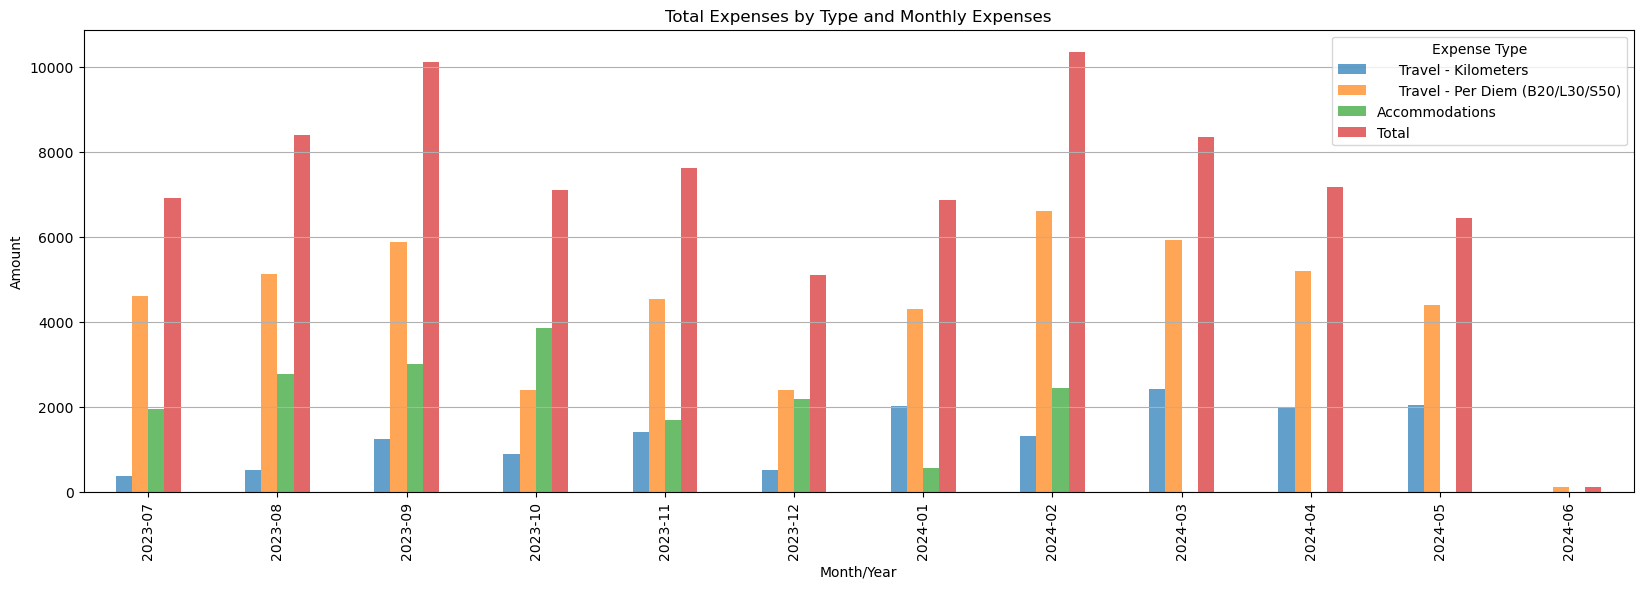

In [73]:
# Plotting total expenses by type and monthly expenses in one figure
plt.figure(figsize=(14, 6))

# Plotting monthly expenses
expenses_dft.plot(kind='bar', figsize=(20, 6), alpha=0.7)

# Adding labels and title
plt.xlabel('Month/Year')
plt.ylabel('Amount')
plt.title('Total Expenses by Type and Monthly Expenses')
plt.legend(title='Expense Type')
plt.grid(axis = 'y')
plt.show()

In all the months the Per Diem expense was the highest one, followed by Accommodations and Kilometers.
The distribution over the months was similar, except for the month 2023-09 and 2024-02, those months where the most expensive ones.

In [49]:
# Select all the columns except for the Total column
expenses_dft = expenses_dft.loc[:,expenses_dft.columns!='Total']

# You can calculate the sum of each column to represent the pie chart
sums = expenses_dft.sum()

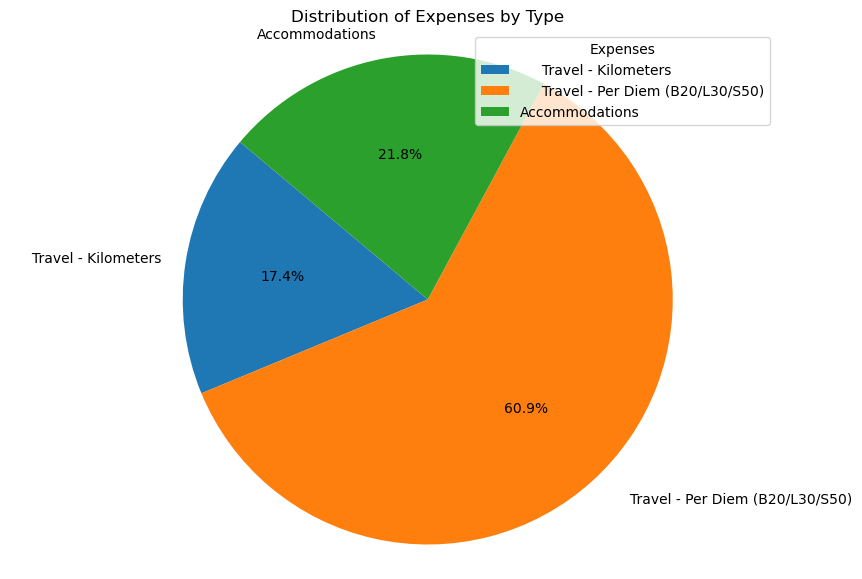

In [50]:
# Plotting
plt.figure(figsize=(9, 7))
plt.pie(sums, labels=sums.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Expenses', loc='upper right')
plt.title('Distribution of Expenses by Type')
# plt.text(0, -1.2,"Only 8.7% of this Phase expenses where not Per Diem",fontsize=12, ha='center')
plt.show()

In [75]:
#-------------------------------------------- Purchases -------------------------------------#

#Select only the purchases from Phase 4
purchase_dft = purchase_df[purchase_df['Type'].str.contains('Phase 4', na=False)]
purchase_dft

#Calculate Accommodations total by month and transform it into long form
purchase_dft = pd.melt(purchase_dft, id_vars=['Type'], var_name='Month/Year', value_name = 'Amount')

# Format columns Month/Year and sort the DF by that column
purchase_dfm = (
    purchase_dft
    .assign(**{
        'Month/Year': lambda x: pd.to_datetime(x['Month/Year'], errors='coerce').dt.to_period('M')
    })  # Convert Month/Year to datetime and month/year format
    .sort_values(by='Month/Year')  # Sort by Month/Year
    .groupby('Month/Year')['Amount'].sum().reset_index()  # Group by Month/Year to get monthly purchases
)


C:\Users\David\AppData\Local\Temp\ipykernel_288\3069737206.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'Month/Year': lambda x: pd.to_datetime(x['Month/Year'], errors='coerce').dt.to_period('M')


## 2. Purchase Analysis <a name="purchase-analysis"></a>
### 2.1. Purchases by Type Table (Descending Amount Order) <a name="purchases-by-type-table"></a>

The table below contains the Amount per Type of Purchase in descending order, this will help us to detect the most and least expensive Purchases

In [66]:
#------------------------Purchases by Type------------------------#
# Calculate purchases per Type
type_df = purchase_dft.groupby('Type')['Amount'].sum().reset_index()
type_df =type_df.sort_values("Amount", ascending=False)

# Clean data: strip whitespaces
type_df['Type'] = type_df['Type'].str.strip()
# Convert 'Amount' to numeric, coerce errors to NaN
type_df['Amount'] = pd.to_numeric(type_df['Amount'], errors='coerce')  
type_df.style

,Type,Amount
18,P069 - Phase 4 - HVAC,31796.420000
15,P069 - Phase 4 - Flooring,30582.190000
6,P069 - Phase 4 - Concrete Floor,30013.570000
31,P069 - Phase 4 - Plumbing,25615.100000
14,P069 - Phase 4 - Electrical,24625.040000
24,P069 - Phase 4 - Misc,18817.380000
8,P069 - Phase 4 - Doors,17422.500000
11,P069 - Phase 4 - Drywall / Insulation,11903.280000
20,P069 - Phase 4 - Interior Framing,7459.350000
5,P069 - Phase 4 - Classroom,7418.860000


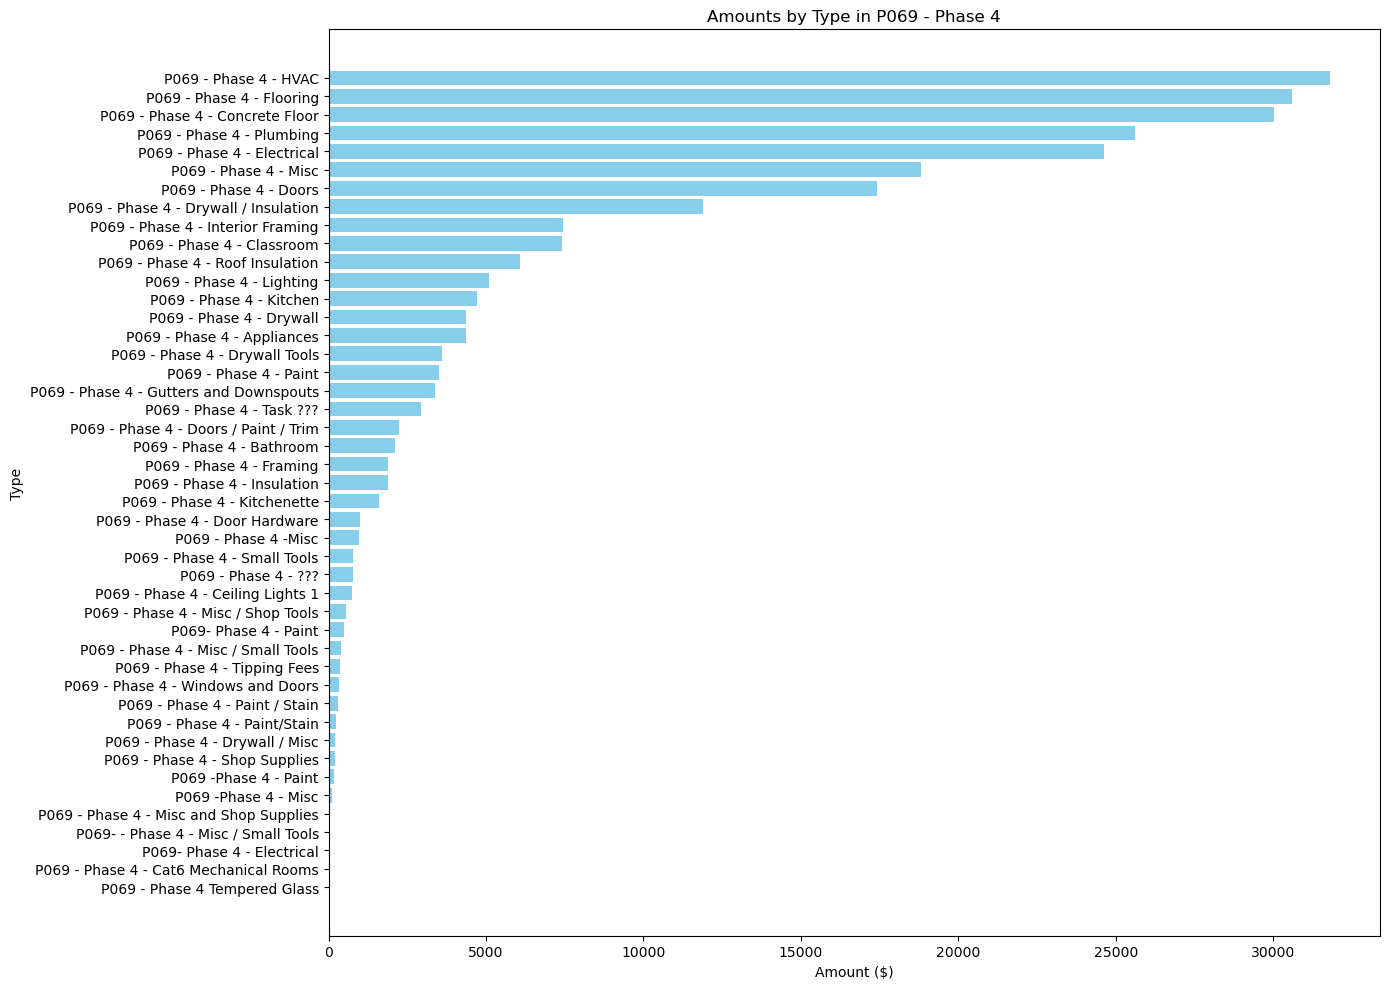

In [53]:
# Plotting the bar chart
plt.figure(figsize=(14, 10))
plt.barh(type_df['Type'], type_df['Amount'], color='skyblue')  # Horizontal bar chart for better label visibility
plt.xlabel('Amount ($)')
plt.ylabel('Type')
plt.title('Amounts by Type in P069 - Phase 4')
plt.gca().invert_yaxis()  # To have the largest bar at the top
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap

# Show the plot
plt.show()

### 2.2. Purchases by Month Table <a name="purchases-by-month-table"></a>
The table below displays the total of Purchases per Month, this amount is the sum of all the purchases done each month, including sub contracts, tools, materials, etc

In [54]:
#Monthly Purchase Table
purchase_dfm.style

,Month/Year,Amount
0,2023-07,46555.030000
1,2023-08,11727.370000
2,2023-09,45199.070000
3,2023-10,12342.700000
4,2023-11,37847.630000
5,2023-12,3331.360000
6,2024-01,36275.550000
7,2024-02,2278.680000
8,2024-03,34806.000000
9,2024-04,19774.830000


## 3. Visualizations <a name="visualizations"></a>
### 3.1. Expenses by Type and Total Expenses <a name="monthly-expenses-visualization"></a>

<Figure size 1400x600 with 0 Axes>

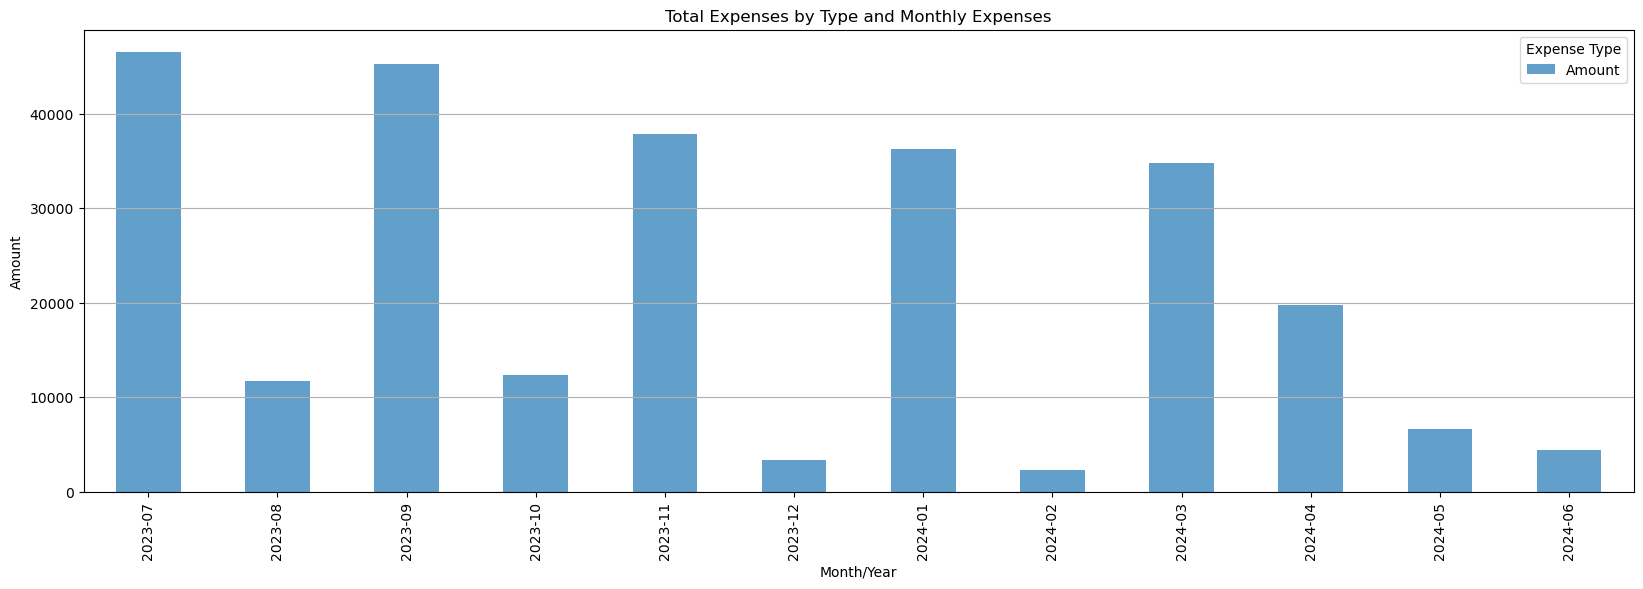

In [55]:
# Plotting total expenses by type and monthly expenses in one figure
plt.figure(figsize=(14, 6))

# Plotting monthly expenses
purchase_dfm.plot(kind='bar', figsize=(20, 6), alpha=0.7)

# Adding labels and title
plt.xlabel('Month/Year')
plt.ylabel('Amount')

# Set the x-axis tick labels
plt.xticks(range(len(purchase_dfm)), purchase_dfm['Month/Year'], rotation=90)

plt.title('Total Expenses by Type and Monthly Expenses')
plt.legend(title='Expense Type')
plt.grid(axis = 'y')
plt.show()

In [56]:
# Calculate all the totals so that it can be displayed in a table
total_acc = pivot_acc['Accommodations'].sum()
total_pur = purchase_dft['Amount'].sum()
total_expense = expense_long['Amount'].sum()


In [57]:
# Create a new DataFrame with the total sums
total_tbl = pd.DataFrame({
    'Purchase': [total_pur],
    'Accommodations': [total_acc],
    'Per Diem + Kilometers': [total_expense]
})

### 3.2. Distribution of Expenses <a name="distribution-of-expenses"></a>

    On this final section we can compare all the types of Purchases totals

### Total expenses table


In [58]:
total_tbl

,Purchase,Accommodations,Per Diem + Kilometers
0,261138.57,18386.75,66100.67


### 3.3. Comparison of Totals from Purchases, Accommodations, and Per Diem/Kilometers <a name="comparison-of-totals"></a>

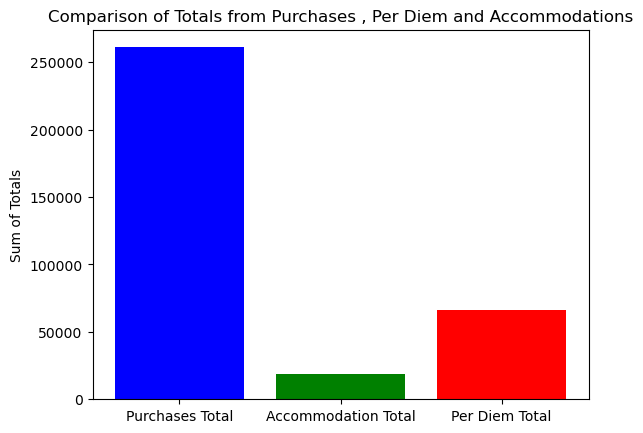

In [59]:
# Creating the plot
fig, ax = plt.subplots()

# Plotting the values
labels = ['Purchases Total', 'Accommodation Total', 'Per Diem Total']
values = [total_pur, total_acc, total_expense]

ax.bar(labels, values, color=['blue', 'green', 'red'])

# Adding labels and title
ax.set_ylabel('Sum of Totals')
ax.set_title('Comparison of Totals from Purchases , Per Diem and Accommodations')

# Show the plot
plt.show()

### 4. Conclusions <a name="conclusions"></a>
The rise in sub-contracting expenses suggests a growing dependence on external services, warranting closer examination for cost optimization.